<a href="https://colab.research.google.com/github/data-analytics-arg/NewsScraper/blob/development/src/Scraper_P12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bienvenido al scraper de Página 12!
Hola! Esta notebook nos permitira scrapear la información del noticiero Argentino de Pagina12 y así identificar los trading topics del país. 

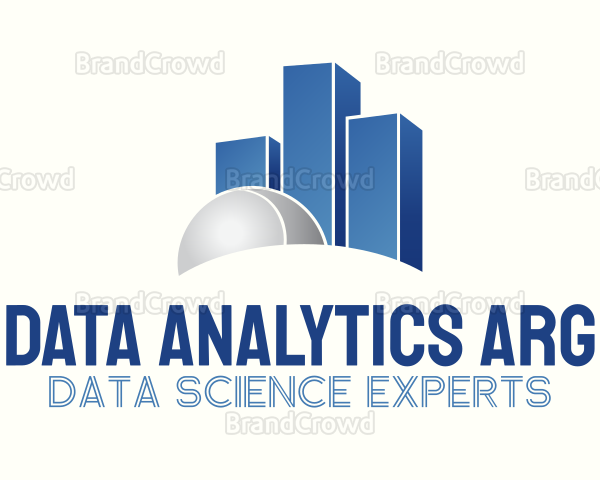

---



Si tiene alguna duda sobre las librerías puedes consultar la documentación respectiva:
*     [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/")
*     [Request](https://docs.python-requests.org/en/latest/)
*     [Pandas](https://www.google.com/search?client=safari&rls=en&q=pandas+documentation&ie=UTF-8&oe=UTF-8)

In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

In [51]:
# asignamos la web a scrapear a una variable, que llamamos url
url = 'https://www.pagina12.com.ar/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15'}

In [52]:
# hacemos un request de esa url y si el estado es 200 paseramos el texto de la página
try:
  p12 = requests.get(url, headers=headers)
  if p12.status_code==200:
    # parseamos el texto de la pagina principal
    s = BeautifulSoup(p12.text, 'lxml')
except Exception as e:
  print('Error:')
  print(e)
  print('\n')

In [54]:
print(s.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="no-js"><head><meta charset="utf-8"/><title>Página12 | La otra mirada</title><meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/><meta content="1541638399393436" name="fb:pages" property="fb:pages"/><meta content="es_AR" name="og:locale" property="og:locale"/><meta content="Página12 | La otra mirada" name="og:tit

In [55]:
secciones = s.find('ul', attrs={'class': 'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/universidad-diario']

In [56]:
# ahora repetimos el proceso, haciendo un request a cada elemento de la lista 'links_secciones':
try:
  request_de_seccion = requests.get(links_secciones[0], headers=headers)
  if request_de_seccion.status_code==200:
    # parseamos el texto 
    soup_de_seccion = BeautifulSoup(request_de_seccion.text, 'lxml')
    print(soup_de_seccion.prettify)
except Exception as e:
  print('Error:')
  print(e)
  print('\n')


<bound method Tag.prettify of <!DOCTYPE html>
<html amp="" lang="es"><head><meta charset="utf-8"/><title>El país | Página12</title><!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ --><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><script type="application/ld+json">{"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": "False","image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_de

In [84]:
# creamos una funcion para que traiga todos los links de la seccion que le pongamos

def obtener_notas(soup_de_seccion):
    lista_notas = []
    # obtengo articulo principal y validamos si hubo extracción
    noticia_h2 = soup_de_seccion.find('h2', attrs={'class': 'title-list'})
    if noticia_h2:
        lista_notas.append(noticia_h2.a.get('href'))
    # obtengo articulos con imágenes y validamos si hubo extracción
    noticias_h3 = soup_de_seccion.find_all('h3', attrs={'class': 'title-list'})
    if noticias_h3:
        for i in range(len(noticias_h3)):
            lista_notas.append(noticias_h3[i].a.get('href'))
    # obtengo la lista final y validamos si hubo extracción
    noticias_h4 = soup_de_seccion.find_all('h4', attrs={'class': 'is-display-inline title-list'})
    if noticias_h4:
        for i in range(len(noticias_h4)):
            lista_notas.append(noticias_h4[i].a.get('href'))
    # damos el formato
    lista_notas_nueva=[]
    for nota in lista_notas:
      nota = nota.replace("''", "").replace(" '", "")
      lista_notas_nueva.append(" http://www.pagina12.com.ar" + nota)
    return (lista_notas_nueva)

In [59]:
# obtenemos la lista de noticias para la primera sección
lista_notas = obtener_notas(soup_de_seccion)
lista_notas

[' http://www.pagina12.com.ar/374588-libertarios-o-autoritarios',
 ' http://www.pagina12.com.ar/374585-gabriela-cerruti-renuncio-a-su-banca-en-diputados',
 ' http://www.pagina12.com.ar/374494-las-mujeres-desalojadas-de-la-villa-31-marcharon-al-obelisco',
 ' http://www.pagina12.com.ar/374489-los-secuestros-extorsivos-del-batallon-de-inteligencia-601-c',
 ' http://www.pagina12.com.ar/374488-alberto-fernandez-desmintio-que-el-acuerdo-con-el-fmi-vaya-a',
 ' http://www.pagina12.com.ar/374473-diputados-destacan-el-proyecto-de-ley-que-convierte-planes-s',
 ' http://www.pagina12.com.ar/374471-paro-de-trenes-el-ministerio-de-trabajo-dicto-la-conciliacio',
 ' http://www.pagina12.com.ar/374470-el-hallazgo-de-los-documentos-secretos-de-la-side-sobre-amia',
 ' http://www.pagina12.com.ar/374460-vidal-y-las-indemnizaciones-un-discurso-de-campana-que-contr',
 ' http://www.pagina12.com.ar/374453-los-candidatos-a-diputados-nacionales-de-caba-debaten-en-tel',
 ' http://www.pagina12.com.ar/374402-pandora-

In [60]:
# hacemos el request para la nota
try:
  r_nota = requests.get(lista_notas[0], headers=headers)
  if r_nota.status_code==200:
    s_nota = BeautifulSoup(r_nota.text, 'lxml')
    print(s_nota.prettify)
except Exception as e:
  print('Error:')
  print(e)
  print('\n')


<bound method Tag.prettify of <!DOCTYPE html>
<html class="no-js"><head><meta charset="utf-8"/><title>¿Libertarios o autoritarios? | Página12</title><link href="https://www.pagina12.com.ar/374588-libertarios-o-autoritarios" rel="canonical"/><link href="https://www.pagina12.com.ar/374588-libertarios-o-autoritarios?amp=1" rel="amphtml"/><script async="" src="https://news.google.com/swg/js/v1/swg.js"></script><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><script type="application/ld+json">{"@context": "http://schema.org","@type": "BreadcrumbList","itemListElement": [{"@type

In [68]:
nota = fecha = s_nota.find('div', attrs={'class': 'date modification-date'}).find('span')
print(nota.get_text())

13 de octubre de 2021 - 18:54


In [77]:
# extraemos los distintos contenidos de la nota :

def obtener_info(s_nota):
    try:

        # creamos un diccionario vacio para ir metiendo la informacion
        ret_dict = {}

        # Extraemos la fecha
        fecha = s_nota.find('div', attrs={'class': 'date modification-date'}).find('span')
        if fecha:
            ret_dict['fecha'] = fecha.get_text()
        else:
            ret_dict['fecha'] = None

        # Extraemos la información de la seción de cabecera
        cabecera = s_nota.find('div', attrs={'class': 'section-2-col article-header'}).find('div', attrs={'class': 'col 2-col'})

        # Extraemos el titulo
        titulo = cabecera.find('h1')
        ret_dict['titulo'] = titulo.get_text() if titulo else None

        # Extraemos la volanta
        volanta = cabecera.find('h4')
        ret_dict['volanta'] = volanta.get_text() if volanta else None

        # Extraemos el copete
        copete = cabecera.find('h3')
        ret_dict['copete'] = copete.get_text() if copete else None

        # Extraemos el cuerpo
        cuerpo = s_nota.find('div', attrs={'class': 'article-text'})
        if cuerpo:
            ret_dict['texto'] = cuerpo.get_text()
        else:
            ret_dict['texto'] = None

        # Extraemos el autor
        autor = s_nota.find('div', attrs={'class': 'authors-inner-list'})
        if autor:
            ret_dict['autor'] = autor.a.get_text()
        else:
            ret_dict['autor'] = None

        # extraemos imagen principal de la nota
        media = s_nota.find('div', attrs={'class': 'article-main-media-image__container'})
        if media:
            imagenes = media.find_all('img')
            if len(imagenes) == 0:
                print('no se encontraron imagenes')
            else:
                imagen = imagenes[-1]
                img_src = imagen.get('data-src')
                try:
                    img_req = requests.get(img_src)
                    if img_req.status_code == 200:
                        ret_dict['imagen'] = img_req.content
                    else:
                        ret_dict['imagen'] = None
                except:
                    print('No ha sido posible obtener la imagen')
        else:
            print('no se encontro media')
            
        # Extraemos la seccion
        seccion_nombre = s_nota.find('div', attrs={'class': 'suplement'})
        if seccion_nombre:
            ret_dict['seccion'] = seccion_nombre.a.get_text()
        else:
            ret_dict['seccion'] = None

        return ret_dict

    except Exception as e:
        print('Error')
        print(e)
        print('\n')

In [78]:
obtener_info(s_nota)

{'autor': 'Roberto Follari',
 'copete': '',
 'fecha': '13 de octubre de 2021 - 18:54',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe2\x02@ICC_PROFILE\x00\x01\x01\x00\x00\x020ADBE\x02\x10\x00\x00mntrRGB XYZ \x07\xcf\x00\x06\x00\x03\x00\x00\x00\x00\x00\x00acspAPPL\x00\x00\x00\x00none\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-ADBE\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ncprt\x00\x00\x00\xfc\x00\x00\x002desc\x00\x00\x010\x00\x00\x00kwtpt\x00\x00\x01\x9c\x00\x00\x00\x14bkpt\x00\x00\x01\xb0\x00\x00\x00\x14rTRC\x00\x00\x01\xc4\x00\x00\x00\x0egTRC\x00\x00\x01\xd4\x00\x00\x00\x0ebTRC\x00\x00\x01\xe4\x00\x00\x00\x0erXYZ\x00\x00\x01\xf4\x00\x00\x00\x14gXYZ\x00\x00\x02\x08\x00\x00\x00\x14bXYZ\x00\x00\x02\x1c\x00\x00\x00\x14text\x00\x00\x00\x00Copyrig

In [80]:
# definimos una funcion cuyo parametro va a ser la url de la nota que queremos scrapear
def scrape_nota(url_nota):
    try:
        r_nota = requests.get(url_nota, headers=headers)
    except Exception as e:
        print('Error scrapeando url', url_nota)
        print(e)
        return None
    if r_nota.status_code != 200:
        print(f'Error obteniendo nota {url_nota}')
        print(f'Status Code={r_nota.status_code}')
        return None
    s_nota = BeautifulSoup(r_nota.text, 'lxml')
    ret_dict = obtener_info(s_nota)
    ret_dict['url_nota'] = url_nota
    return ret_dict

In [86]:
# armamos una lista con todas las notas que estan en cada una de las secciones (links_secciones)
notas = []
for i in range(len(links_secciones)):
    r = requests.get(links_secciones[i], headers=headers)
    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'lxml')
        notas.extend(obtener_notas(soup))
    else:
        print('no se pudo obtener la seccion', link)

data = []

for i, nota in enumerate(notas):
    
    
    print(f'procesando nota: {i}/{len(notas)}')
    data.append(scrape_nota(nota))

[' http://www.pagina12.com.ar/374617-la-justicia-archivo-una-denuncia-contra-alejandra-gils-carbo', ' http://www.pagina12.com.ar/374588-libertarios-o-autoritarios', ' http://www.pagina12.com.ar/374585-gabriela-cerruti-renuncio-a-su-banca-en-diputados', ' http://www.pagina12.com.ar/374494-las-mujeres-desalojadas-de-la-villa-31-marcharon-al-obelisco', ' http://www.pagina12.com.ar/374489-los-secuestros-extorsivos-del-batallon-de-inteligencia-601-c', ' http://www.pagina12.com.ar/374488-alberto-fernandez-desmintio-que-el-acuerdo-con-el-fmi-vaya-a', ' http://www.pagina12.com.ar/374473-diputados-destacan-el-proyecto-de-ley-que-convierte-planes-s', ' http://www.pagina12.com.ar/374471-paro-de-trenes-el-ministerio-de-trabajo-dicto-la-conciliacio', ' http://www.pagina12.com.ar/374470-el-hallazgo-de-los-documentos-secretos-de-la-side-sobre-amia', ' http://www.pagina12.com.ar/374460-vidal-y-las-indemnizaciones-un-discurso-de-campana-que-contr', ' http://www.pagina12.com.ar/374453-los-candidatos-a-d

In [87]:
# pasamos lo obtenido  a un df de pandas y exportamos a un .csv
df = pd.DataFrame(data)
#df.to_csv(f'{datetime.datetime.today().strftime("%d-%m-%Y-%H:%M:%S")}.csv')

In [88]:
df

,fecha,titulo,volanta,copete,texto,autor,imagen,seccion,url_nota
0,13 de octubre de 2021 - 20:58,La Justicia archivó una denuncia contra Alejan...,Las operaciones del gobierno de Mauricio Macri...,"Sobre la base de una nota de Clarín, y con el ...",Otra causa que se cae en Comodoro Py. Esta vez...,María Zacco,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,http://www.pagina12.com.ar/374617-la-justicia...
1,13 de octubre de 2021 - 18:54,¿Libertarios o autoritarios?,,,Fue Pinochet quien impuso la retirada del Esta...,Roberto Follari,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,http://www.pagina12.com.ar/374588-libertarios...
2,13 de octubre de 2021 - 18:45,Gabriela Cerruti renunció a su banca en Diputados,Será parte del área de Comunicación de Preside...,,La periodista y escritora Gabriela Cerruti ren...,María Zacco,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,http://www.pagina12.com.ar/374585-gabriela-ce...
3,13 de octubre de 2021 - 13:26,Las mujeres desalojadas de la Villa 31 marchar...,"En dos semanas, la Ciudad sólo les ofreció un ...",Le exigieron al gobierno de Horacio Rodríguez ...,Las mujeres desalojadas de Villa 31 marcharon ...,María Zacco,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,http://www.pagina12.com.ar/374494-las-mujeres...
4,13 de octubre de 2021 - 13:03,Los secuestros extorsivos del Batallón de Inte...,Se confirmó el procesamiento de Rubén Bufano y...,"En la segunda mitad de la dictadura, empezaron...",Rubén Bufano y Arturo Ricardo Silzle eran dos ...,María Zacco,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,http://www.pagina12.com.ar/374489-los-secuest...
...,...,...,...,...,...,...,...,...,...
61,24 de agosto de 2021 - 19:13,Ciencias Sociales: una semana para que voten l...,Elecciones de consejeros directivos en la UBA,,"Desde hoy y hasta el viernes, los graduados y ...",María Zacco,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,http://www.pagina12.com.ar/363614-ciencias-so...
62,14 de agosto de 2021 - 01:02,Paritaria docente universitaria: los sindicato...,No hubo acuerdo y la negociación pasó a cuarto...,,Las federaciones de docentes universitarias se...,María Zacco,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,http://www.pagina12.com.ar/361491-paritaria-d...
63,13 de agosto de 2021 - 01:42,La UBA celebró sus 200 años,Se entregaron distinciones a 200 personalidade...,,"""Toda mi vida estaré agradecido a lo que esta ...",María Zacco,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,http://www.pagina12.com.ar/361213-la-uba-cele...
64,13 de agosto de 2021 - 01:42,Los 200 años de la UBA: entre el agradecimient...,La palabra de cinco de las personalidades dist...,Los recuerdos y las reflexiones de Dora Barran...,"Para celebrar sus 200 años, la Universidad de ...",María Zacco,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,None,http://www.pagina12.com.ar/361265-los-200-ano...
